# Population Simulator

## Basic Population Simulator with Ageing Birthing and Murder

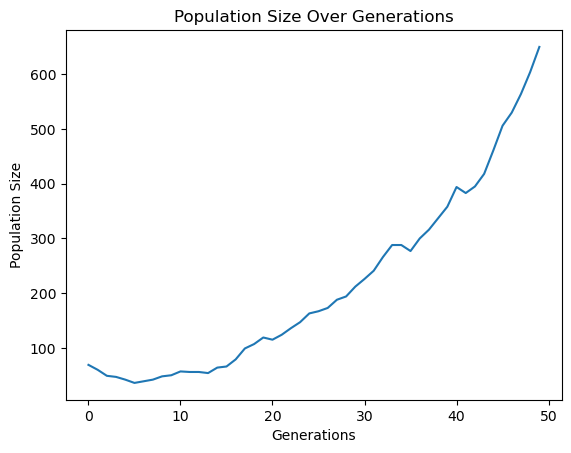

In [1]:
import random
import matplotlib.pyplot as plt

# Define the Individual class
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.age = 0
        self.lifespan = lifespan

    def age_one_year(self):
        self.age += 1
        return self.age >= self.lifespan

    def mutate(self):
        # Mutation logic: small random changes to traits
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.05, 0.05)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.05, 0.05)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.05, 0.05)))

# Define the Population class
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
    
    def create_random_individual(self):
        aggression = random.uniform(0, 1)
        peacefulness = random.uniform(0, 1)
        birth_rate = random.uniform(0, 1)
        return Individual(aggression, peacefulness, birth_rate)
    
    def simulate_year(self):
        # Aging individuals
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]
        
        # Murder events based on aggression
        survivors = []
        for ind in self.individuals:
            if random.random() > ind.aggression:
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Birth events based on birth rate
        new_births = []
        for ind in self.individuals:
            if random.random() < ind.birth_rate:
                new_births.append(self.create_random_individual())
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()
    
    def simulate_generations(self, generations):
        population_sizes = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
        
        return population_sizes

# Initial simulation
population = Population(100)
population_sizes = population.simulate_generations(50)

# Plot the population size over generations
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.show()


## Population Simulator with Additional Concept of Intelligence, Health, Wealth, Socialising, etc.

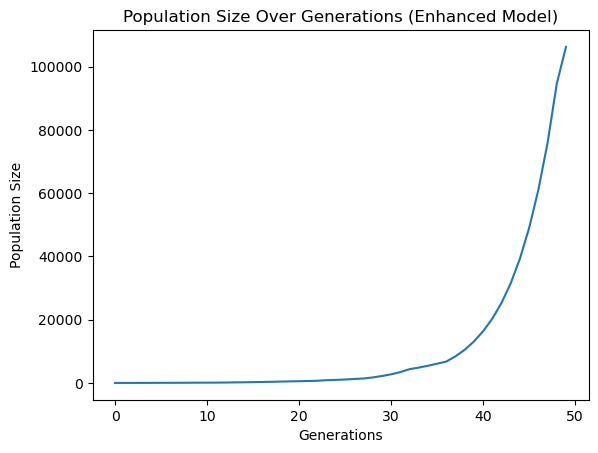

In [6]:
# Define the Individual class with additional traits
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = 0
        self.lifespan = lifespan

    def age_one_year(self):
        self.age += 1
        return self.age >= self.lifespan

    def mutate(self):
        # Mutation logic: small random changes to traits
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.05, 0.05)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.05, 0.05)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.05, 0.05)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.05, 0.05)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.05, 0.05)))
        self.health = max(0, min(1, self.health + random.uniform(-0.05, 0.05)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.05, 0.05)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.05, 0.05)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.05, 0.05)))

# Define the Population class with complex interactions
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
    
    def create_random_individual(self):
        # Randomly initialize an individual with all traits
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def simulate_year(self):
        # Aging individuals
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]
        
        # Handle interactions
        survivors = []
        for ind in self.individuals:
            # Murder chance influenced by aggression and peacefulness
            murder_risk = ind.aggression - ind.peacefulness
            if random.random() > murder_risk:
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Birth events influenced by birth rate, health, and wealth
        new_births = []
        for ind in self.individuals:
            birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth)
            if random.random() < birth_probability:
                new_births.append(self.create_random_individual())
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Social cohesion can protect against murders
        social_protection = sum(ind.social_cohesion for ind in self.individuals) / len(self.individuals)
        if social_protection > 0.5:
            survivors = []
            for ind in self.individuals:
                if random.random() > 0.1:  # Reduced murder rate due to social cohesion
                    survivors.append(ind)
            self.individuals = survivors

    def simulate_generations(self, generations):
        population_sizes = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
        
        return population_sizes

# Enhanced simulation
population = Population(10)
population_sizes = population.simulate_generations(50)

# Plot the population size over generations
plt.plot(population_sizes)
plt.title("Population Size Over Generations (Enhanced Model)")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.show()


## Population Simulator With Even More Features Such as Resources, Disease Spread, etc

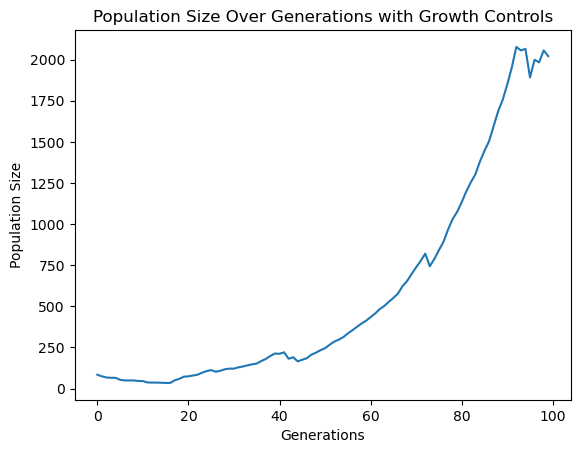

In [7]:
# Define constants
INITIAL_RESOURCES = 1000  # Initial resources available
RESOURCE_REGENERATION = 100  # Resources regenerated each year
CARRYING_CAPACITY = 500  # Maximum population the environment can support

# Define the Individual class with additional traits and aging factors
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = age
        self.lifespan = lifespan

    def age_one_year(self):
        self.age += 1
        return self.age >= self.lifespan

    def is_fertile(self):
        # Fertility is higher between ages 18 and 40
        return 18 <= self.age <= 40

    def mutate(self):
        # Mutation logic: small random changes to traits
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.05, 0.05)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.05, 0.05)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.05, 0.05)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.05, 0.05)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.05, 0.05)))
        self.health = max(0, min(1, self.health + random.uniform(-0.05, 0.05)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.05, 0.05)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.05, 0.05)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.05, 0.05)))

# Define the Population class with resource management and disease outbreaks
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.resources = INITIAL_RESOURCES
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def simulate_year(self):
        # Age individuals
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Resource allocation and consumption
        total_resource_demand = sum(ind.health for ind in self.individuals)
        if total_resource_demand > self.resources:
            # Not enough resources for everyone, some individuals will die based on their health
            survival_chance = self.resources / total_resource_demand
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Murder events
        survivors = []
        for ind in self.individuals:
            murder_risk = ind.aggression - ind.peacefulness
            if random.random() > murder_risk:
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Birth events influenced by fertility, birth rate, and resource availability
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.resources / (CARRYING_CAPACITY * 2))
                if random.random() < birth_probability:
                    new_births.append(self.create_random_individual())
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()
        
        # Disease outbreak
        if random.random() < 0.1:  # 10% chance of a disease outbreak
            disease_severity = random.uniform(0, 0.5)
            self.individuals = [ind for ind in self.individuals if random.random() > (disease_severity * (1 - ind.health))]
        
        # Resource regeneration
        self.resources = min(INITIAL_RESOURCES, self.resources + RESOURCE_REGENERATION)

    def simulate_generations(self, generations):
        population_sizes = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
        
        return population_sizes

# Enhanced simulation with growth controls
population = Population(100)
population_sizes = population.simulate_generations(100)

# Plot the population size over generations
plt.plot(population_sizes)
plt.title("Population Size Over Generations with Growth Controls")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.show()


## Population Simulator With Even More Features Such as Climate Change, Natural Disasters, and Seasons 

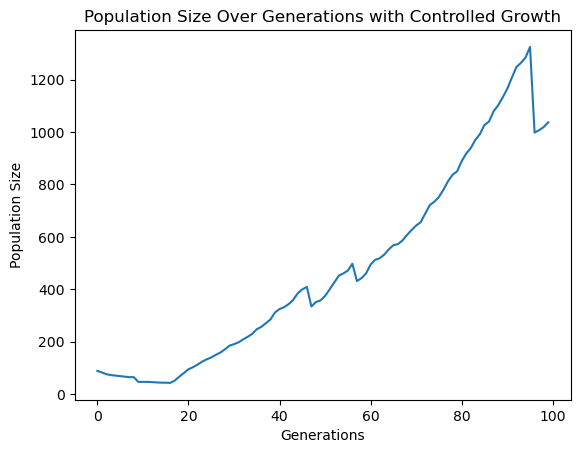

In [23]:
import random
import matplotlib.pyplot as plt

# Define constants
INITIAL_RESOURCES = 1500  # Reduced initial resources available
RESOURCE_REGENERATION = 100  # Reduced resources regenerated each year
CARRYING_CAPACITY = 400  # Maximum population the environment can support

# Environmental factors
SEASONAL_EFFECT = 0.15  # Adjusted seasonal variation in resource availability
CLIMATE_VARIABILITY = 0.05  # Kept the random changes in climate affecting resource regeneration
DISASTER_PROBABILITY = 0.03  # Moderate probability of a natural disaster occurring each year

# Define the Individual class with additional traits and aging factors
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = age
        self.lifespan = lifespan

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.95  # Health declines with age
        return self.age >= self.lifespan

    def is_fertile(self):
        # Fertility declines after age 30
        return 18 <= self.age <= 40

    def mutate(self):
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.03, 0.03)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.03, 0.03)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))

# Define the Population class with resource management and more complex dynamics
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.resources = INITIAL_RESOURCES
        self.season = "Spring"
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal and climate variability
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY)
        self.resources *= seasonal_factor * climate_factor

        # Natural disaster
        if random.random() < DISASTER_PROBABILITY:
            disaster_impact = random.uniform(0.1, 0.3)
            self.resources -= self.resources * disaster_impact
            self.individuals = [ind for ind in self.individuals if random.random() > disaster_impact]

        # Resource allocation and consumption
        total_resource_demand = sum(ind.health * 1.5 for ind in self.individuals)  # Increased resource demand
        if total_resource_demand > self.resources:
            survival_chance = self.resources / total_resource_demand
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Family units and social cohesion
        survivors = []
        for ind in self.individuals:
            murder_risk = ind.aggression - ind.peacefulness
            social_protection = ind.social_cohesion * 0.2
            if random.random() > (murder_risk - social_protection):
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Birth events influenced by fertility, birth rate, resource availability, and social structure
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.resources / (CARRYING_CAPACITY * 2))  # More challenging birth conditions
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration based on season and climate factors
        self.resources = min(INITIAL_RESOURCES, self.resources + RESOURCE_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
        
        return population_sizes

# Run the modified simulation
population = Population(100)
population_sizes = population.simulate_generations(100)

# Plot the population size over generations
plt.plot(population_sizes)
plt.title("Population Size Over Generations with Controlled Growth")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.show()


## Population Simulator With Added Feature of Technology

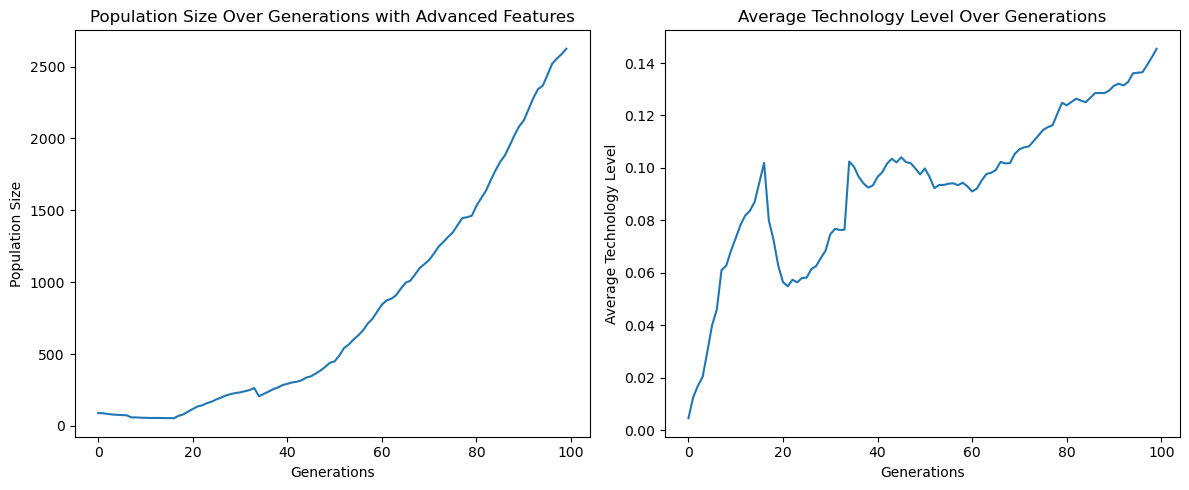

In [24]:
import random
import matplotlib.pyplot as plt

# Define constants
INITIAL_FOOD = 1000
INITIAL_WATER = 1000
INITIAL_SHELTER = 1000

FOOD_REGENERATION = 100
WATER_REGENERATION = 100
SHELTER_REGENERATION = 50

CARRYING_CAPACITY = 400

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.03

# Define the Individual class with additional traits, aging, and technology
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = age
        self.lifespan = lifespan
        self.technology_level = 0  # New trait to track technology development

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.95  # Health declines with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.03, 0.03)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.03, 0.03)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))

# Define the Population class with resource management, technology, and culture
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.season = "Spring"
        self.technology_progress = 0  # Track overall technological progress
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal and climate variability
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY)
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor

        # Natural disaster
        if random.random() < DISASTER_PROBABILITY:
            disaster_impact = random.uniform(0.1, 0.3)
            self.food -= self.food * disaster_impact
            self.water -= self.water * disaster_impact
            self.shelter -= self.shelter * disaster_impact
            self.individuals = [ind for ind in self.individuals if random.random() > disaster_impact]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)  # Increased resource demand with technology
        total_food_demand = total_resource_demand * 0.4
        total_water_demand = total_resource_demand * 0.4
        total_shelter_demand = total_resource_demand * 0.2

        # Check resource limits
        if total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter:
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Family units, social cohesion, and cultural spread
        survivors = []
        for ind in self.individuals:
            murder_risk = ind.aggression - ind.peacefulness
            social_protection = ind.social_cohesion * 0.2
            if random.random() > (murder_risk - social_protection):
                survivors.append(ind)
        
        self.individuals = survivors
        
        # Technology development and cultural traits spread
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:  # Probability of innovation
                ind.technology_level += 0.1  # Increment technology level
            if random.random() < ind.cooperation * 0.1:  # Probability of knowledge sharing
                self.technology_progress += 0.1
        
        # Birth events influenced by fertility, birth rate, resource availability, and technology
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration based on season and climate factors
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
        
        return population_sizes, technology_levels

# Run the advanced simulation
population = Population(100)
population_sizes, technology_levels = population.simulate_generations(100)

# Plot the population size over generations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations with Advanced Features")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 2, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

plt.tight_layout()
plt.show()


## ## Population Simulator With Even More Features Such as Environment Adaptation, Territory and Territorial Expansion, and Leadership

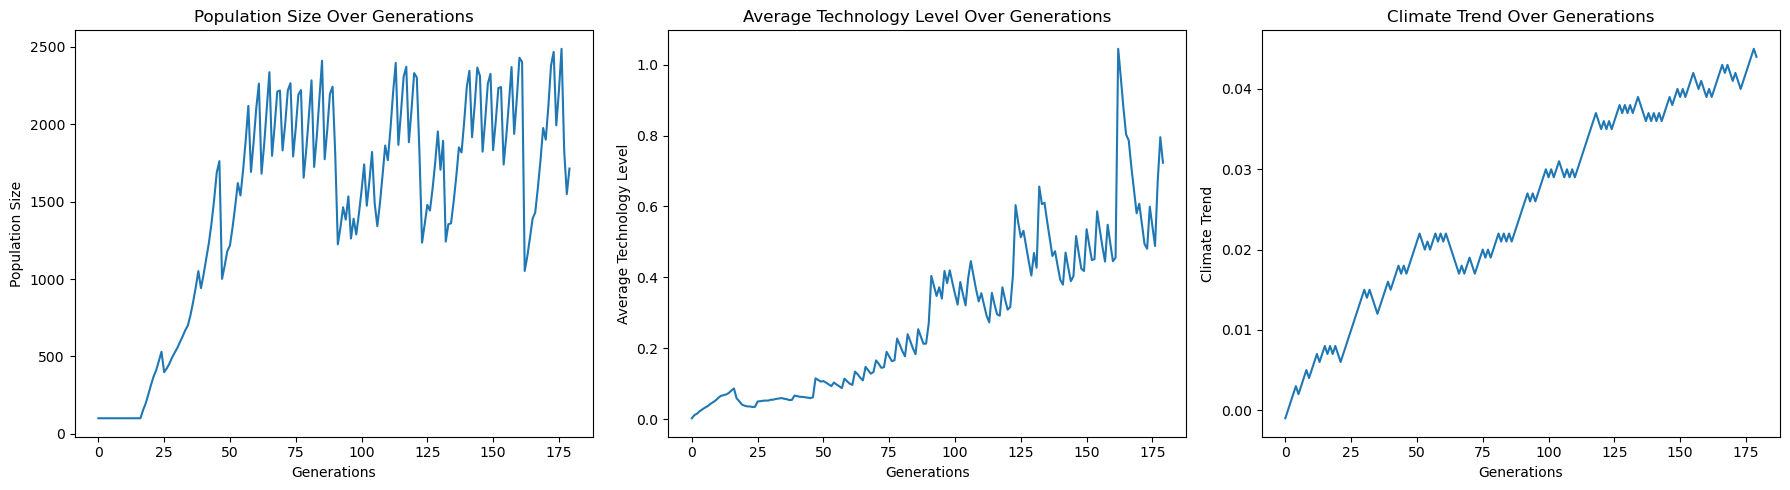

In [27]:
import random
import matplotlib.pyplot as plt

# Define constants
INITIAL_FOOD = 1000
INITIAL_WATER = 1000
INITIAL_SHELTER = 1000

FOOD_REGENERATION = 100
WATER_REGENERATION = 100
SHELTER_REGENERATION = 50

CARRYING_CAPACITY = 400

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.03
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect

# Define the Individual class with additional traits, aging, technology, and adaptation
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.age = age
        self.lifespan = lifespan
        self.technology_level = 0
        self.environmental_adaptation = random.uniform(0, 1)  # New trait for environmental adaptation
        self.group = None  # New attribute to track group membership

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.95  # Health declines with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.03, 0.03)))
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.03, 0.03)))
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))  # Mutation in adaptation

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0}
        self.territory = random.uniform(0, 1)  # Territory richness

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05

    def compete_for_resources(self, other_group):
        # Simple competition logic
        if self.territory + random.uniform(-0.1, 0.1) > other_group.territory:
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5

# Define the Population class with groups, migration, and advanced dynamics
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0, 1),
            intelligence=random.uniform(0, 1),
            social_cohesion=random.uniform(0, 1),
            health=random.uniform(0, 1),
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0, 1),
            curiosity=random.uniform(0, 1)
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Natural disaster
        if random.random() < DISASTER_PROBABILITY:
            disaster_impact = random.uniform(0.2, 0.5)
            self.food -= self.food * disaster_impact
            self.water -= self.water * disaster_impact
            self.shelter -= self.shelter * disaster_impact
            self.individuals = [ind for ind in self.individuals if random.random() > disaster_impact]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.4
        total_water_demand = total_resource_demand * 0.4
        total_shelter_demand = total_resource_demand * 0.2

        # Check resource limits
        if total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter:
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, and competition
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology and adaptation
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the advanced simulation
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(180)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()


## Most Complex Population Simulator with All Social Constructs Such as Religion, Tradition. Concepts of Trade, Risk Taking, Mental Health, EQ and IQ, Leadership Style, Immunity, War, Laws, Governance, Language, etc

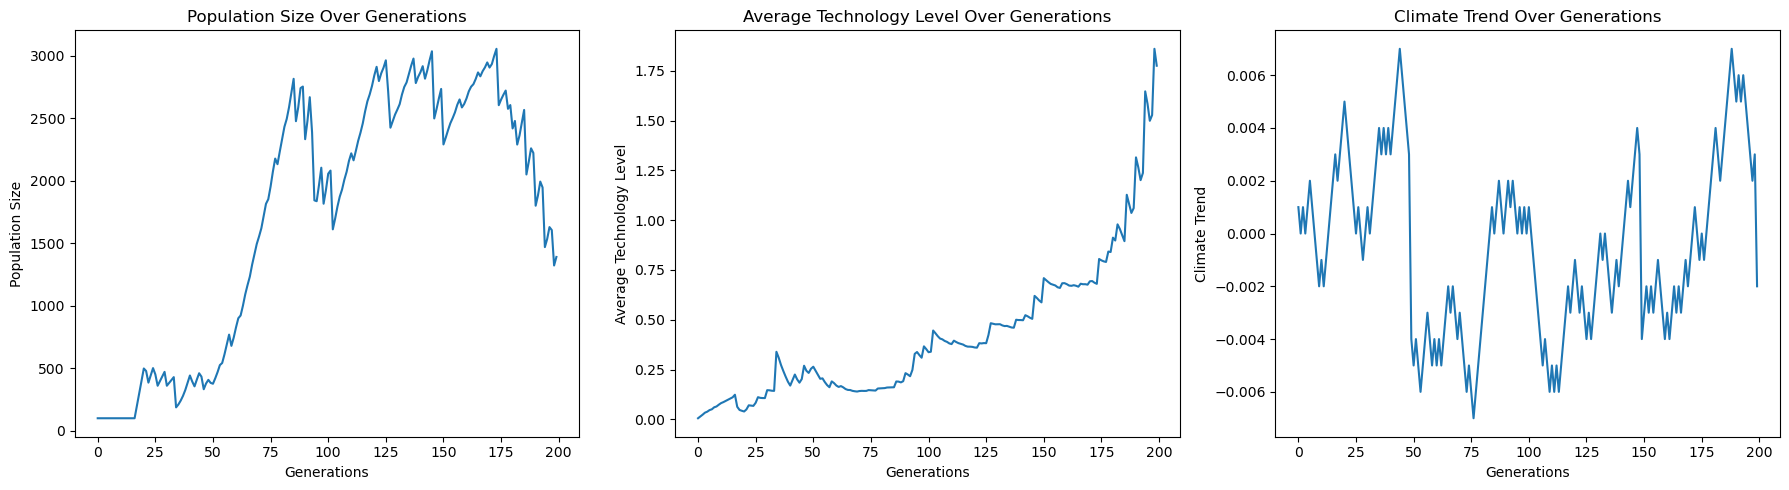

In [38]:
import random
import matplotlib.pyplot as plt

# Constants for resources and environment
INITIAL_FOOD = 2000  # Increased initial resources available
INITIAL_WATER = 2000
INITIAL_SHELTER = 1500
FOOD_REGENERATION = 200  # Increased resources regenerated each year
WATER_REGENERATION = 200
SHELTER_REGENERATION = 100
MEDICINE_REGENERATION = 50
TOOLS_REGENERATION = 50

CARRYING_CAPACITY = 400

# Environmental factors
SEASONAL_EFFECT = 0.15
CLIMATE_VARIABILITY = 0.05
DISASTER_PROBABILITY = 0.02  # Reduced probability of a catastrophic event
LONG_TERM_CLIMATE_CHANGE = 0.001  # Gradual climate change effect
CATASTROPHIC_EVENT_PROBABILITY = 0.005  # Reduced probability of catastrophic events
DISEASE_SPREAD_PROBABILITY = 0.05  # Reduced probability of disease outbreak
CLIMATE_CYCLE_LENGTH = 50  # Length of climate cycles (e.g., ice ages)

# Define the Individual class with full complexity
class Individual:
    def __init__(self, aggression, peacefulness, birth_rate, intelligence, social_cohesion, health, wealth, cooperation, curiosity, technology_level, environmental_adaptation, risk_taking, tradition, religion, leadership_style, emotional_intelligence, mental_health, age=0, lifespan=80):
        self.aggression = aggression
        self.peacefulness = peacefulness
        self.birth_rate = birth_rate
        self.intelligence = intelligence
        self.social_cohesion = social_cohesion
        self.health = health
        self.wealth = wealth
        self.cooperation = cooperation
        self.curiosity = curiosity
        self.technology_level = technology_level
        self.environmental_adaptation = environmental_adaptation
        self.risk_taking = risk_taking
        self.tradition = tradition
        self.religion = religion
        self.leadership_style = leadership_style
        self.emotional_intelligence = emotional_intelligence
        self.mental_health = mental_health
        self.age = age
        self.lifespan = lifespan
        self.group = None  # Track group membership
        self.language = random.uniform(0, 1)  # Language diversity
        self.immune_system = random.uniform(0.5, 1)  # Increased base immunity to diseases
        self.symbiotic_relationship = False  # Whether the individual has a symbiotic relationship with another species

    def age_one_year(self):
        self.age += 1
        if self.age > 40:
            self.health *= 0.98  # Slower health decline with age
        return self.age >= self.lifespan

    def is_fertile(self):
        return 18 <= self.age <= 40

    def mutate(self):
        # Complex mutations with potential for adaptation and technology improvement
        self.aggression = max(0, min(1, self.aggression + random.uniform(-0.03, 0.03)))
        self.peacefulness = max(0, min(1, self.peacefulness + random.uniform(-0.03, 0.03)))
        self.birth_rate = max(0, min(1, self.birth_rate + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on birth rate
        self.intelligence = max(0, min(1, self.intelligence + random.uniform(-0.03, 0.03)))
        self.social_cohesion = max(0, min(1, self.social_cohesion + random.uniform(-0.03, 0.03)))
        self.health = max(0, min(1, self.health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on health
        self.wealth = max(0, min(1, self.wealth + random.uniform(-0.03, 0.03)))
        self.cooperation = max(0, min(1, self.cooperation + random.uniform(-0.03, 0.03)))
        self.curiosity = max(0, min(1, self.curiosity + random.uniform(-0.03, 0.03)))
        self.technology_level = max(0, min(10, self.technology_level + random.uniform(-0.01, 0.02)))
        self.environmental_adaptation = max(0, min(1, self.environmental_adaptation + random.uniform(-0.02, 0.02)))
        self.risk_taking = max(0, min(1, self.risk_taking + random.uniform(-0.03, 0.03)))
        self.tradition = max(0, min(1, self.tradition + random.uniform(-0.03, 0.03)))
        self.religion = max(0, min(1, self.religion + random.uniform(-0.03, 0.03)))
        self.emotional_intelligence = max(0, min(1, self.emotional_intelligence + random.uniform(-0.03, 0.03)))
        self.mental_health = max(0, min(1, self.mental_health + random.uniform(-0.02, 0.02)))  # Reduced mutation impact on mental health
        self.immune_system = max(0.5, min(1, self.immune_system + random.uniform(-0.01, 0.01)))  # Reduced mutation impact on immunity

# Define the Group class to manage groups of individuals
class Group:
    def __init__(self, leader):
        self.leader = leader
        self.members = [leader]
        self.resources = {"food": 0, "water": 0, "shelter": 0, "medicine": 0, "tools": 0}
        self.territory = random.uniform(0.5, 1)  # Increase base territory richness
        self.cultural_practices = random.uniform(0.5, 1)  # More shared cultural practices
        self.language = leader.language  # Shared language within the group
        self.trade_networks = 0  # Track trade relationships with other groups
        self.governance_structure = leader.leadership_style  # Initial governance style
        self.laws = {}  # Simple legal system

    def add_member(self, individual):
        individual.group = self
        self.members.append(individual)

    def manage_resources(self):
        # Allocate resources among members
        for resource in self.resources:
            if self.resources[resource] > 0:
                allocation = self.resources[resource] / len(self.members)
                for member in self.members:
                    if resource == "food":
                        member.health += allocation * 0.1
                    elif resource == "water":
                        member.health += allocation * 0.1
                    elif resource == "shelter":
                        member.health += allocation * 0.05
                    elif resource == "medicine":
                        member.health += allocation * 0.2
                    elif resource == "tools":
                        member.technology_level += allocation * 0.1

    def trade_with_group(self, other_group):
        # Trade resources between groups based on their trade networks and resources
        if self.trade_networks > 0 and other_group.trade_networks > 0:
            trade_amount = min(self.resources["tools"], other_group.resources["medicine"])
            self.resources["tools"] -= trade_amount
            other_group.resources["medicine"] += trade_amount

    def compete_for_resources(self, other_group):
        # Complex competition logic including technology and leadership influence
        if (self.territory + self.leader.intelligence + self.leader.technology_level + random.uniform(-0.1, 0.1)) > \
           (other_group.territory + other_group.leader.intelligence + other_group.leader.technology_level):
            self.resources["food"] += other_group.resources["food"] * 0.5
            other_group.resources["food"] *= 0.5
            self.resources["water"] += other_group.resources["water"] * 0.5
            other_group.resources["water"] *= 0.5
            self.resources["shelter"] += other_group.resources["shelter"] * 0.5
            other_group.resources["shelter"] *= 0.5

    def enforce_laws(self):
        # Enforce laws to maintain order within the group
        if self.governance_structure in ['autocratic', 'democratic']:
            for law, enforcement in self.laws.items():
                for member in self.members:
                    if random.random() > enforcement:
                        member.mental_health -= 0.05  # Punish lawbreakers with less severity

# Define the Population class with full complexity
class Population:
    def __init__(self, size):
        self.individuals = [self.create_random_individual() for _ in range(size)]
        self.groups = []
        self.food = INITIAL_FOOD
        self.water = INITIAL_WATER
        self.shelter = INITIAL_SHELTER
        self.medicine = MEDICINE_REGENERATION
        self.tools = TOOLS_REGENERATION
        self.season = "Spring"
        self.technology_progress = 0
        self.climate_trend = 0  # Track long-term climate trends
        self.climate_cycle = 0  # Track the climate cycle
    
    def create_random_individual(self):
        return Individual(
            aggression=random.uniform(0, 1),
            peacefulness=random.uniform(0, 1),
            birth_rate=random.uniform(0.5, 1),  # Increased base birth rate
            intelligence=random.uniform(0.5, 1),  # Increased base intelligence
            social_cohesion=random.uniform(0.5, 1),  # Increased base social cohesion
            health=random.uniform(0.5, 1),  # Increased base health
            wealth=random.uniform(0, 1),
            cooperation=random.uniform(0.5, 1),  # Increased base cooperation
            curiosity=random.uniform(0, 1),
            technology_level=random.uniform(0.5, 1),  # Increased base technology level
            environmental_adaptation=random.uniform(0.5, 1),  # Increased base environmental adaptation
            risk_taking=random.uniform(0, 1),
            tradition=random.uniform(0, 1),
            religion=random.uniform(0, 1),
            leadership_style=random.choice(['autocratic', 'democratic', 'tribal']),
            emotional_intelligence=random.uniform(0.5, 1),  # Increased base emotional intelligence
            mental_health=random.uniform(0.5, 1)  # Increased base mental health
        )
    
    def form_group(self, leader):
        group = Group(leader)
        self.groups.append(group)
        return group
    
    def simulate_year(self):
        self.individuals = [ind for ind in self.individuals if not ind.age_one_year()]

        # Environmental effects: seasonal, climate variability, and long-term trends
        self.update_season()
        seasonal_factor = self.get_seasonal_factor()
        climate_factor = 1 + random.uniform(-CLIMATE_VARIABILITY, CLIMATE_VARIABILITY) + self.climate_trend
        self.food *= seasonal_factor * climate_factor
        self.water *= seasonal_factor * climate_factor
        self.shelter *= seasonal_factor * climate_factor
        self.medicine *= seasonal_factor * climate_factor
        self.tools *= seasonal_factor * climate_factor

        # Long-term climate change
        self.climate_trend += LONG_TERM_CLIMATE_CHANGE * random.choice([-1, 1])

        # Climate cycles (e.g., ice ages)
        self.climate_cycle += 1
        if self.climate_cycle >= CLIMATE_CYCLE_LENGTH:
            self.climate_cycle = 0
            self.climate_trend *= -1  # Reverse the climate trend

        # Catastrophic events
        if random.random() < CATASTROPHIC_EVENT_PROBABILITY:
            catastrophic_impact = random.uniform(0.3, 0.7)  # Reduced impact of catastrophic events
            self.food -= self.food * catastrophic_impact
            self.water -= self.water * catastrophic_impact
            self.shelter -= self.shelter * catastrophic_impact
            self.medicine -= self.medicine * catastrophic_impact
            self.tools -= self.tools * catastrophic_impact
            self.individuals = [ind for ind in self.individuals if random.random() > catastrophic_impact]

        # Disease outbreak
        if random.random() < DISEASE_SPREAD_PROBABILITY:
            disease_severity = random.uniform(0.1, 0.3)  # Reduced severity of diseases
            self.individuals = [ind for ind in self.individuals if random.random() > disease_severity * (1 - ind.immune_system)]

        # Resource allocation and consumption
        total_resource_demand = sum((ind.health * 1.5 + ind.technology_level * 0.1) for ind in self.individuals)
        total_food_demand = total_resource_demand * 0.3
        total_water_demand = total_resource_demand * 0.3
        total_shelter_demand = total_resource_demand * 0.2
        total_medicine_demand = total_resource_demand * 0.1
        total_tools_demand = total_resource_demand * 0.1

        # Check resource limits
        if (total_food_demand > self.food or total_water_demand > self.water or total_shelter_demand > self.shelter or 
            total_medicine_demand > self.medicine or total_tools_demand > self.tools):
            survival_chance = min(self.food / total_food_demand, self.water / total_water_demand, self.shelter / total_shelter_demand,
                                  self.medicine / total_medicine_demand, self.tools / total_tools_demand)
            self.individuals = [ind for ind in self.individuals if random.random() < survival_chance]
        
        # Social dynamics: Group formation, migration, trade, competition, and governance
        for ind in self.individuals:
            if ind.group is None:
                leader = ind if ind.intelligence > random.uniform(0, 1) else random.choice(self.individuals)
                group = self.form_group(leader)
                group.add_member(ind)
            elif random.random() < ind.curiosity * 0.05:
                # Migration to a new group
                new_group = self.form_group(ind)
                new_group.add_member(ind)
        
        # Group management
        for group in self.groups:
            group.manage_resources()
            group.enforce_laws()

            if random.random() < 0.1:  # Random chance of competition
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.compete_for_resources(other_group)

            if random.random() < 0.05:  # Random chance of trade
                other_group = random.choice(self.groups)
                if other_group != group:
                    group.trade_with_group(other_group)

        # Technology development and adaptation
        for ind in self.individuals:
            if random.random() < ind.intelligence * 0.05:
                ind.technology_level += 0.1
            if random.random() < ind.cooperation * 0.1:
                self.technology_progress += 0.1

            # Environmental adaptation
            if self.climate_trend > 0:
                ind.health *= (1 + ind.environmental_adaptation * 0.1)
            elif self.climate_trend < 0:
                ind.health *= (1 - ind.environmental_adaptation * 0.1)
        
        # Birth events influenced by technology, medicine, adaptation, and cultural traits
        new_births = []
        for ind in self.individuals:
            if ind.is_fertile():
                birth_probability = ind.birth_rate * ind.health * (1 + ind.wealth) * (self.food / (CARRYING_CAPACITY * 2)) * (1 + ind.technology_level * 0.05)
                if random.random() < birth_probability:
                    child = self.create_random_individual()
                    child.health = (ind.health + random.uniform(-0.05, 0.05)) / 2
                    child.intelligence = (ind.intelligence + random.uniform(-0.05, 0.05)) / 2
                    child.language = ind.language  # Inherit language
                    child.immune_system = (ind.immune_system + random.uniform(-0.05, 0.05)) / 2  # Inherit immune system
                    new_births.append(child)
        
        self.individuals.extend(new_births)
        
        # Mutations
        for ind in self.individuals:
            ind.mutate()

        # Resource regeneration
        self.food = min(INITIAL_FOOD, self.food + FOOD_REGENERATION * seasonal_factor * climate_factor)
        self.water = min(INITIAL_WATER, self.water + WATER_REGENERATION * seasonal_factor * climate_factor)
        self.shelter = min(INITIAL_SHELTER, self.shelter + SHELTER_REGENERATION * seasonal_factor * climate_factor)
        self.medicine = min(MEDICINE_REGENERATION, self.medicine + MEDICINE_REGENERATION * seasonal_factor * climate_factor)
        self.tools = min(TOOLS_REGENERATION, self.tools + TOOLS_REGENERATION * seasonal_factor * climate_factor)

    def update_season(self):
        if self.season == "Spring":
            self.season = "Summer"
        elif self.season == "Summer":
            self.season = "Autumn"
        elif self.season == "Autumn":
            self.season = "Winter"
        elif self.season == "Winter":
            self.season = "Spring"
    
    def get_seasonal_factor(self):
        if self.season == "Spring":
            return 1.1
        elif self.season == "Summer":
            return 1.0
        elif self.season == "Autumn":
            return 0.85
        elif self.season == "Winter":
            return 0.7

    def simulate_generations(self, generations):
        population_sizes = []
        technology_levels = []
        climate_trends = []
        for _ in range(generations):
            self.simulate_year()
            population_sizes.append(len(self.individuals))
            technology_levels.append(self.technology_progress / len(self.individuals) if len(self.individuals) > 0 else 0)
            climate_trends.append(self.climate_trend)
        
        return population_sizes, technology_levels, climate_trends

# Run the comprehensive simulation with adjustments to stabilize population
population = Population(100)
population_sizes, technology_levels, climate_trends = population.simulate_generations(200)

# Plot the results
plt.figure(figsize=(18, 5))

# Plot the population size over generations
plt.subplot(1, 3, 1)
plt.plot(population_sizes)
plt.title("Population Size Over Generations")
plt.xlabel("Generations")
plt.ylabel("Population Size")

# Plot the average technology level over generations
plt.subplot(1, 3, 2)
plt.plot(technology_levels)
plt.title("Average Technology Level Over Generations")
plt.xlabel("Generations")
plt.ylabel("Average Technology Level")

# Plot the climate trend over generations
plt.subplot(1, 3, 3)
plt.plot(climate_trends)
plt.title("Climate Trend Over Generations")
plt.xlabel("Generations")
plt.ylabel("Climate Trend")

plt.tight_layout()
plt.show()
